## Module 2: Image Processing

In this notebook, I will explore different methods to transform input images into clearer, easier to analyze output images.


### Section 1: Introduction

In this section, I will cover topics including
1. Pixel Processing
2. Linear Shift-Invariant Systems and Convolutions
3. Linear Image Filters
4. Non-Linear Image Filters
5. Template Matching by Correlation

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

**Pixel Processing**

Let $f$ be a function that represents an image with the value at $f(x, y)$ being the intensity value at the point (x, y). We can then define a transformation T s.t. $g(x,y) = T(f(x,y))$ where g is the function representing a new image. 

T can darken, lighten, and invert the image as well as decrease/increase the image's contrast or even grayscale the image.

[Tyler the creator](https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fvariety.com%2Fwp-content%2Fuploads%2F2014%2F03%2Ftyler-the-creator1.jpg%3Fresize%3D450&f=1&nofb=1&ipt=59ec17da8aa227625ea538f95e54ba718c127af08eb272a258d002cf456b53d9&ipo=images) will be our muse today :)

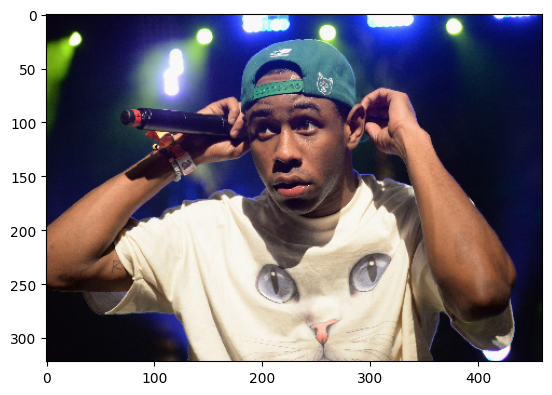

In [9]:
tyler = cv2.imread(rf'Data/tyler-the-creator.jpg')
tyler = cv2.resize(tyler, dsize =(0,0), fx=0.1, fy=0.1)
plt.imshow(cv2.cvtColor(tyler, cv2.COLOR_BGR2RGB))

In [43]:
mi, ma = np.min(np.subtract(np.int32(tyler),100)), np.max(tyler-100)
print(mi, ma)

-100 255


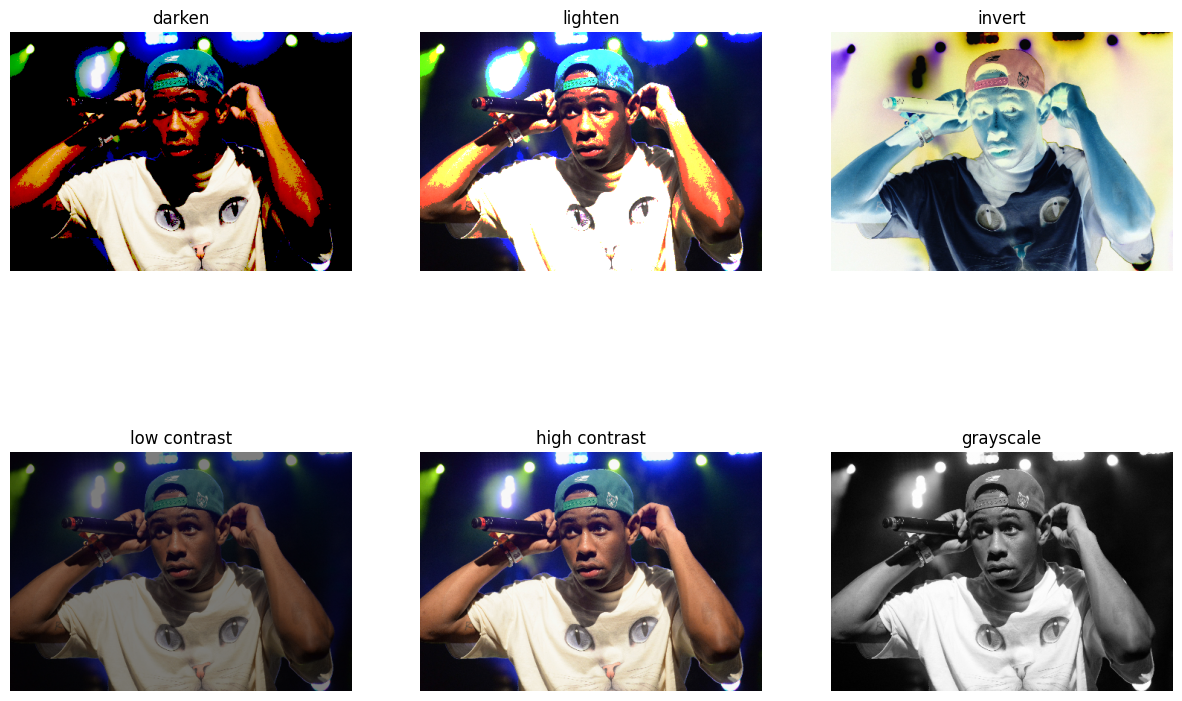

In [52]:
new_tyler = np.int32(tyler)
modified_tylers = {
    'darken': np.where(new_tyler - 128 < 0, 0, tyler), # darken
    "lighten": np.where(new_tyler + 128 > 255, 255, tyler), # lighten
    'invert': 255 - tyler, # invert
    'low contrast': tyler // 2, # low contrast
    'high contrast': np.where(tyler * 2 > 255, 255, tyler), # high contrast
    'grayscale': (0.1 * tyler[...,0]) + (0.6 * tyler[...,1]) +(0.3 * tyler[...,2]) # grayscale
}

fig, ax = plt.subplots(2,3, figsize=(15,10))
for i, (name, image) in enumerate(modified_tylers.items()):
    if i < 5:
        ax[i//3][i%3].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB), label=name)
    else:
        ax[1][2].imshow(image, cmap='gray', label = name)
    ax[i//3][i%3].set_title(name)    
    ax[i//3][i%3].axis('off')